# PROJECT: WEB SCRAPING AND ANALYZING CAREER BUILDER WEBSITE

### Table Of Contents

> Introduction



> Objective



> Questions


> Web Scraping


> Data Wrangling



> Conclusions



## Introduction


> This project was conducted in Dec 2022. The tech industry is in a recession. Job search is more complex than ever when many companies lay off or freeze hiring. Watching this surge of mass layoffs in big tech companies, I am curious about the job market. "What positions are being recruited the most at the moment?. Are any tech companies still recruiting?". To answer this question, I started to scrape Career Builder - the top 3 most visited job search in Vietnam. After scouring the web and wrangling data, we will analyze the market trend and conduct Exploratory Data Analysis. Data analyzed were jobs from Dec 2, 2022 to Jan 4, 2023. Let's find insights through this website.

## Objective


> This project primarily focused on web scraping and data wrangling. Using the data scraped on the website; the project tends to give the audience updated information about the labor market and the demand between categories at the end of 2022 in Vietnam. Besides the overall trend of the market and the top 10 most employed jobs, this project also focused on two positions: engineer and data analyst - the 2 most popular jobs in tech.

## Questions:


> 1/ Overall infomation about the dataset

> 2/ Which company is actively hiring for jobs?


> 3/ Which job is recruiting the most?


> 4/ Which location has the most job search?


> 5/ What are the average salary per location?


> 6/ What are the average salary per job?


> 7/ Software Engineer Position overview


> 8/ Data Analyst Position Overview

## Web Scraping



> Scape a website is time-consuming, especially with big traffic websites like Career Builder with thousands of job posts. To conduct this project more effectively, I divided the project into 2 parts. Part 1 will focus on scraping the website and organizing the data into Dataframe. Part 2 will focus on wrangling the data and investigating any insights withdrawn from the dataset. After that will visualize the representation of data in the form of graphs. I scraped 3 times at 3 different timelines within 1 week and got 35k data in total. However, there will be some duplicates. In the following section, we will clean and organize the data.


### Here is the link to web scraping section 
https://colab.research.google.com/drive/1j8foFnViXqzUZPHcGgvFM3IsM6_1wTcl#scrollTo=StRMto9DC9EN

## Data Wrangling

In [1]:
#Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
import seaborn as sns
import math
sns.set_theme()
import re

In [2]:
#Upload the dataset scraped on Dec 28, 2022
from google.colab import files
uploaded1 = files.upload()
CB1 = pd.read_csv(io.BytesIO(uploaded1['CB1.csv']))
CB1.head()

Saving CB1.csv to CB1.csv


,Column1,title,article_link,company,company_link,salary,location,date
0,0,modern trade executive,https://careerbuilder.vn/vi/tim-viec-lam/moder...,suntory pepsico việt nam,https://careerbuilder.vn/vi/nha-tuyen-dung/sun...,Lương: 27 Tr - 35 Tr VND,bắc ninh,1/1/23
1,1,regulatory affairs manager- hà nội,https://careerbuilder.vn/vi/tim-viec-lam/regul...,công ty tnhh eisai việt nam,https://careerbuilder.vn/vi/nha-tuyen-dung/con...,Lương: Cạnh tranh,hà nội,31-12-2022
2,2,trưởng phòng đầu tư ( chủ đầu tư bất động sản),https://careerbuilder.vn/vi/tim-viec-lam/truon...,công ty cổ phần đầu tư thương mại kỹ thuâ...,https://careerbuilder.vn/vi/nha-tuyen-dung/con...,Lương: Cạnh tranh,hà nội,31-12-2022
3,3,trưởng phòng chăm sóc khách hàng,https://careerbuilder.vn/vi/tim-viec-lam/truon...,công ty cổ phần thương mại bắc sông trà,https://careerbuilder.vn/vi/nha-tuyen-dung/con...,Lương: Cạnh tranh,quảng ngãi,31-12-2022
4,4,nhân viên marketing sàn tmđt,https://careerbuilder.vn/vi/tim-viec-lam/nhan-...,công ty tnhh thương mại và dịch vụ quốc tế sab...,https://careerbuilder.vn/vi/nha-tuyen-dung/con...,"Lương: 6,5 Tr - 32 Tr VND",hà nội,31-12-2022


In [3]:
#Upload the dataset scraped on Jan 1, 2023
from google.colab import files
uploaded2 = files.upload()
CB2 = pd.read_csv(io.BytesIO(uploaded2['CB2.csv']))
CB2.head()

Saving CB2.csv to CB2.csv


,Column1,title,article_link,company,company_link,salary,location,date
0,0.0,Sales Engineer (Route Sales),https://careerbuilder.vn/vi/tim-viec-lam/sales...,Daikin Air Conditioning (Vietnam) Joint Stock ...,https://careerbuilder.vn/vi/nha-tuyen-dung/dai...,Lương: Cạnh tranh,Hồ Chí Minh,30-12-2022
1,1.0,Inside Sales,https://careerbuilder.vn/vi/tim-viec-lam/insid...,RICOH VIETNAM COMPANY LIMITED,https://careerbuilder.vn/vi/nha-tuyen-dung/ric...,Lương: Cạnh tranh,Hồ Chí Minh,30-12-2022
2,2.0,Trưởng Phòng Kinh Doanh Sub Online - FPT Play,https://careerbuilder.vn/vi/tim-viec-lam/truon...,FPT Truyền hình - Chi nhánh Công ty Cổ Phần Vi...,https://careerbuilder.vn/vi/nha-tuyen-dung/fpt...,Lương: Cạnh tranh,Hồ Chí Minh,30-12-2022
3,3.0,Chuyên viên/CVCC Giao dịch tiền mặt - FI - MSB...,https://careerbuilder.vn/vi/tim-viec-lam/chuye...,Ngân hàng Thương mại Cổ phần Hàng Hải Việt Nam...,https://careerbuilder.vn/vi/nha-tuyen-dung/nga...,Lương: Cạnh tranh,Hà Nội,30-12-2022
4,4.0,[HN/HCM] Accounting & Tax Trainee,https://careerbuilder.vn/vi/tim-viec-lam/hn-hc...,TMF Vietnam Company Limited,https://careerbuilder.vn/vi/nha-tuyen-dung/tmf...,"Lương: Lên đến 3,2 Tr VND",Hồ Chí Minh,30-12-2022


In [4]:
#Upload the dataset scraped on Jan 4, 2023
from google.colab import files
uploaded3 = files.upload()
CB3 = pd.read_csv(io.BytesIO(uploaded3['CB3.csv']))
CB3.head()

Saving CB3.csv to CB3.csv


,Unnamed: 0,title,article_link,company,company_link,salary,location,date
0,0,Nhân Viên Kinh Doanh Cho Thuê Căn Hộ,https://careerbuilder.vn/vi/tim-viec-lam/nhan-...,CÔNG TY TNHH PHÁT TRIỂN GIẢNG VÕ,https://careerbuilder.vn/vi/nha-tuyen-dung/con...,Lương: Cạnh tranh,Hà Nội,04-01-2023
1,1,Nhân Viên R&D Sản Phẩm,https://careerbuilder.vn/vi/tim-viec-lam/nhan-...,Công Ty TNHH Chế Biến Thực Phẩm & Bánh Kẹo Phạ...,https://careerbuilder.vn/vi/nha-tuyen-dung/con...,Lương: Cạnh tranh,Hồ Chí Minh,04-01-2023
2,2,QA Engineer (Work at Binh Duong),https://careerbuilder.vn/vi/tim-viec-lam/qa-en...,HOYA LENS VIETNAM LTD,https://careerbuilder.vn/vi/nha-tuyen-dung/hoy...,Lương: Cạnh tranh,Bình Dương,04-01-2023
3,3,Chuyên viên Quản lý Đại lý BĐS,https://careerbuilder.vn/vi/tim-viec-lam/chuye...,Công ty Cổ phần Tập đoàn Hoàng Minh,https://careerbuilder.vn/vi/nha-tuyen-dung/con...,Lương: 10 Tr - 20 Tr VND,Hà Nội,04-01-2023
4,4,Sales Trainer,https://careerbuilder.vn/vi/tim-viec-lam/sales...,Công Ty CP Sữa Quốc Tế IDP,https://careerbuilder.vn/vi/nha-tuyen-dung/con...,Lương: Cạnh tranh,Hồ Chí Minh,04-01-2023


In [5]:
#Concat 3 datasets into 1 
cb_list = [CB1, CB2, CB3]
df = pd.concat(cb_list)

In [6]:
df.shape

(35340, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35340 entries, 0 to 8499
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Column1       26839 non-null  float64
 1   title         35340 non-null  object 
 2   article_link  35340 non-null  object 
 3   company       35340 non-null  object 
 4   company_link  35340 non-null  object 
 5   salary        35340 non-null  object 
 6   location      35340 non-null  object 
 7   date          35340 non-null  object 
 8   Unnamed: 0    8500 non-null   float64
dtypes: float64(2), object(7)
memory usage: 2.7+ MB


In [8]:
#Drop duplicated rows and unnecessary columns
df.drop_duplicates(subset="article_link", inplace = True)
df.drop(columns=["Column1", 'Unnamed: 0'], inplace = True)

In [9]:
#Lower case some columns
df['title'] = df['title'].str.lower()
df['company'] = df['company'].str.lower()
df['salary'] = df['salary'].str.lower()
df['location'] = df['location'].str.lower()

In [10]:
#Clean title column
def clean_title(s):
  return re.sub(r'\[.*?\]|\(.*?\)|-|/', '', s).strip()

df['cleaned_title'] = df['title'].apply(clean_title)

In [11]:
#Clean and extract salary
df = df.loc[~df['salary'].str.contains('500,000')]
df['salary'] = df['salary'].apply(lambda x: x.split(': ')[1] if ': ' in x else x)
def extract_salary(salary):
  # Check if the salary is a range or a single value
  range_match = re.match(r'(\d+,\d+|\d+)\str\s-\s(\d+,\d+|\d+)\str\svnd', salary)
  single_match = re.match(r'(?:trên\s)?(\d+,\d+|\d+)\str\svnd', salary)
  if range_match:
    # If the salary is a range, extract the minimum and maximum values
    min_salary = float(range_match.group(1).replace(',', '.'))
    max_salary = float(range_match.group(2).replace(',', '.'))
    return min_salary, max_salary
  elif single_match:
    # If the salary is a single value, return it
    return float(single_match.group(1).replace(',', '.'))
  else:
    # If the salary is neither a range nor a single value, return it unchanged
    return salary

df['new_salary'] = df['salary'].apply(extract_salary)

## **Exploratory Data Analysis**

### **1/ Overall infomation about the dataset**

In [12]:
#Number of rows and columns in the dataset
df.shape

(18021, 9)

In [13]:
#Name of columns and its dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18021 entries, 0 to 8492
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          18021 non-null  object
 1   article_link   18021 non-null  object
 2   company        18021 non-null  object
 3   company_link   18021 non-null  object
 4   salary         18021 non-null  object
 5   location       18021 non-null  object
 6   date           18021 non-null  object
 7   cleaned_title  18021 non-null  object
 8   new_salary     18021 non-null  object
dtypes: object(9)
memory usage: 1.4+ MB




> *After 1st cleaning, the dataset is ready to analyze with 18,021 rows and 9 columns*



### **2/ Which company is actively hiring for job at this time?**

In [14]:
df.groupby('company')['article_link'].count().reset_index().sort_values('article_link', ascending = False).head(10)

,company,article_link
2578,ngân hàng tmcp sài gòn - hà nội ( shb ),347
1683,công ty tnhh mediastep software việt nam,316
2319,fpt telecom - chi nhánh công ty cổ phần viễn t...,294
299,công ty cp giáo dục đại dương,263
2575,ngân hàng tmcp quân đội,240
43,abbank - ngân hàng tmcp an bình,188
120,bảo mật,174
2822,tập đoàn karofi holding,156
2502,lienvietpostbank,150
2662,"rgf hr agent vietnam co., ltd",118


> Surprisingly, the bank is one of the most dynamic businesses at the end of this year. Many banks are recruiting, like SHB, MBB, ABB, and LPB, with hundreds of positions at once.


> There are 2 software companies, Mediastep Software and FPT telecom, which are also in the battle to recruit people, respectively 316 jobs and 294 jobs.


> Among the top 10 companies, there is a representative from the education sector; Ocean Edu has 263 jobs opens







### **3/ Which jobs are recruiting the most?**

In [15]:
top_10 = df.groupby('cleaned_title')['article_link'].count().reset_index().sort_values('article_link', ascending = False).head(10)
top_10

,cleaned_title,article_link
6572,nhân viên kinh doanh,258
5077,kế toán tổng hợp,131
2296,chuyên viên tư vấn,126
7113,nhân viên kế toán,66
1886,chuyên viên quan hệ khách hàng cá nhân,65
10939,trưởng phòng kinh doanh,64
1325,chuyên viên kinh doanh,57
6233,nhân viên chăm sóc khách hàng,54
3574,giao dịch viên,53
2237,chuyên viên tuyển dụng,51


In [16]:
words = top_10['cleaned_title'].tolist()
word_counts = {}

# Loop through the words
for word in words:
    # Count the number of times the word appears in the 'column_name' column
    count = df['title'].str.count(word).sum()
    # Store the count in the dictionary
    word_counts[word] = count

df_word_counts = pd.DataFrame.from_dict(word_counts, orient='index', columns=['count'])
df_word_counts.reset_index(inplace=True)
df_word_counts.rename(columns={'index': 'word'}, inplace=True)
df_word_counts.sort_values(by = 'count', ascending = False)

,word,count
0,nhân viên kinh doanh,946
2,chuyên viên tư vấn,446
6,chuyên viên kinh doanh,267
3,nhân viên kế toán,255
1,kế toán tổng hợp,244
5,trưởng phòng kinh doanh,166
8,giao dịch viên,153
4,chuyên viên quan hệ khách hàng cá nhân,97
7,nhân viên chăm sóc khách hàng,97
9,chuyên viên tuyển dụng,86


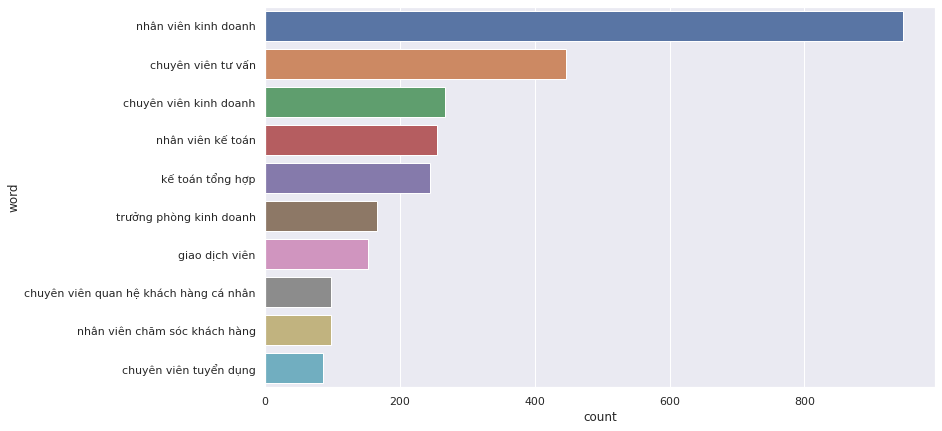

In [17]:
plt.figure(figsize=(12,7))
sns.barplot(data=df_word_counts.sort_values(by = 'count', ascending = False), x="count", y="word")




> **Sales staffs** are the most hiring position, followed by **business consultant** and **accountants**. **Sales Managers** and **tellers** are also much needed and looked for on Career Builder





### **4/ Which location has the most job search?**

In [18]:
location = df.groupby('location')['article_link'].count().reset_index().sort_values('article_link', ascending = False).head(10)
location

,location,article_link
27,hồ chí minh,6904
20,hà nội,6093
3,bình dương,700
76,đồng nai,563
37,long an,298
74,đà nẵng,253
25,hải phòng,202
10,bắc ninh,190
23,hưng yên,157
2,bà rịa - vũng tàu,152


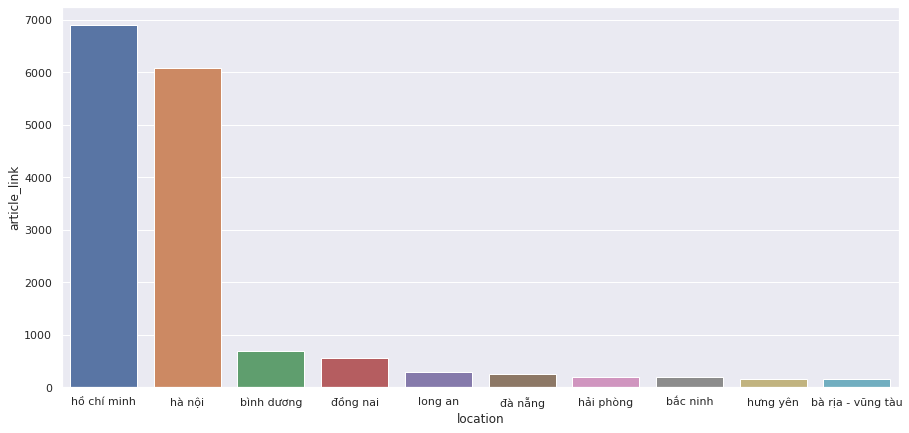

In [19]:
plt.figure(figsize=(15,7))
sns.barplot(data=location, x="location", y="article_link")



> As can be guessed, **Hồ Chí Minh City** and **Hà Nội** are 2 places with the highest recruitment demand. While Hồ Chí Minh accounted for 38% then Hà Nội followed closely with 34%. Followed by Bình Dương, Đồng Nai, Long An, Đà Nẵng, Hải Phòng...



### **5/ What is the average salary per location?**

In [20]:
def extract_first_number(s):
  # Convert the input to a string if it is not already a string
  s = str(s)
  # Use a regular expression to search for a pattern that matches any integer or floating-point number in the string
  m = re.search(r'\d+\.\d+|\d+', s)
  # If a match is found, return the first match
  if m:
    return m.group(0)
  # If no match is found, return None
  return s

df['min_salary(VND)'] = df['new_salary'].apply(extract_first_number)

In [21]:
def extract_second_number(s):
  # Convert the input to a string if it is not already a string
  s = str(s)
  # Use a regular expression to search for a pattern that matches any integer or floating-point number in the string
  m = re.findall(r'\d+\.\d+|\d+', s)
  # If at least two matches are found, return the second match
  if len(m) >= 2:
    return m[1]
  # If fewer than two matches are found, return None
  return s

df['max_salary(VND)'] = df['new_salary'].apply(extract_second_number)

In [22]:
df['min_salary(VND)'] = pd.to_numeric(df['min_salary(VND)'], errors='coerce')
df['max_salary(VND)'] = pd.to_numeric(df['max_salary(VND)'], errors='coerce')
df = df.loc[~((df['min_salary(VND)'] > 200) & (df['min_salary(VND)'] != 0))]

In [23]:
salary = df[(df['new_salary'] != 'cạnh tranh') & (df['min_salary(VND)'] != 0)]
salary['mean_salary'] = (salary['max_salary(VND)'] + salary['min_salary(VND)']) /2
salary

<ipython-input-23-4845dcf4b25a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary['mean_salary'] = (salary['max_salary(VND)'] + salary['min_salary(VND)']) /2


,title,article_link,company,company_link,salary,location,date,cleaned_title,new_salary,min_salary(VND),max_salary(VND),mean_salary
0,modern trade executive,https://careerbuilder.vn/vi/tim-viec-lam/moder...,suntory pepsico việt nam,https://careerbuilder.vn/vi/nha-tuyen-dung/sun...,27 tr - 35 tr vnd,bắc ninh,1/1/23,modern trade executive,"(27.0, 35.0)",27.0,35.0,31.00
4,nhân viên marketing sàn tmđt,https://careerbuilder.vn/vi/tim-viec-lam/nhan-...,công ty tnhh thương mại và dịch vụ quốc tế sab...,https://careerbuilder.vn/vi/nha-tuyen-dung/con...,"6,5 tr - 32 tr vnd",hà nội,31-12-2022,nhân viên marketing sàn tmđt,"(6.5, 32.0)",6.5,32.0,19.25
5,kỹ sư thiết kế,https://careerbuilder.vn/vi/tim-viec-lam/ky-su...,công ty cổ phần tư vấn thiết kế vinaincon,https://careerbuilder.vn/vi/nha-tuyen-dung/con...,trên 15 tr vnd,hà nội,31-12-2022,kỹ sư thiết kế,15.0,15.0,15.0,15.00
6,senior recruitment consultant (it industry),https://careerbuilder.vn/vi/tim-viec-lam/senio...,persolkelly vietnam,https://careerbuilder.vn/vi/nha-tuyen-dung/per...,"17,6 tr - 22 tr vnd",hồ chí minh,31-12-2022,senior recruitment consultant,"(17.6, 22.0)",17.6,22.0,19.80
8,trưởng phòng truyền thông marketing,https://careerbuilder.vn/vi/tim-viec-lam/truon...,công ty cổ phần đại thành,https://careerbuilder.vn/vi/nha-tuyen-dung/con...,15 tr - 25 tr vnd,bắc ninh,31-12-2022,trưởng phòng truyền thông marketing,"(15.0, 25.0)",15.0,25.0,20.00
...,...,...,...,...,...,...,...,...,...,...,...,...
8487,nhân viên video editor,https://careerbuilder.vn/vi/tim-viec-lam/nhan-...,công ty cổ phần nha khoa quốc tế jet dentist,https://careerbuilder.vn/vi/nha-tuyen-dung/con...,trên 14 tr vnd,hồ chí minh,05-12-2022,nhân viên video editor,14.0,14.0,14.0,14.00
8488,nhân viên kế toán công trình,https://careerbuilder.vn/vi/tim-viec-lam/nhan-...,thời trang lining,https://careerbuilder.vn/vi/nha-tuyen-dung/tho...,12 tr - 15 tr vnd,hà nội,05-12-2022,nhân viên kế toán công trình,"(12.0, 15.0)",12.0,15.0,13.50
8489,{thanh xuân-hn} nhân viên chăm sóc khách hàng ...,https://careerbuilder.vn/vi/tim-viec-lam/thanh...,thời trang lining,https://careerbuilder.vn/vi/nha-tuyen-dung/tho...,7 tr - 9 tr vnd,hà nội,05-12-2022,{thanh xuânhn} nhân viên chăm sóc khách hàng o...,"(7.0, 9.0)",7.0,9.0,8.00
8490,nhân viên kinh doanh thị trường khu vực miền đông,https://careerbuilder.vn/vi/tim-viec-lam/nhan-...,"acacy co.,ltd",https://careerbuilder.vn/vi/nha-tuyen-dung/aca...,10 tr - 15 tr vnd,hồ chí minh,05-12-2022,nhân viên kinh doanh thị trường khu vực miền đông,"(10.0, 15.0)",10.0,15.0,12.50


In [24]:
salary['min_salary(VND)'] = pd.to_numeric(salary['min_salary(VND)'], errors='coerce')
salary['min_salary(VND)'] = pd.to_numeric(salary['min_salary(VND)'], errors='coerce')

<ipython-input-24-8400e5d6c4af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary['min_salary(VND)'] = pd.to_numeric(salary['min_salary(VND)'], errors='coerce')
<ipython-input-24-8400e5d6c4af>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary['min_salary(VND)'] = pd.to_numeric(salary['min_salary(VND)'], errors='coerce')


In [25]:
salary_10 = round(salary.groupby('location')['mean_salary'].mean().sort_values(ascending = False).head(10).reset_index())
salary_10

,location,mean_salary
0,quốc tế,41.0
1,tokyo,33.0
2,đồng bằng sông cửu long,32.0
3,kv nam trung bộ,28.0
4,malaysia,24.0
5,kv bắc trung bộ,23.0
6,cao bằng,22.0
7,khác,22.0
8,lai châu,19.0
9,hà tĩnh,18.0


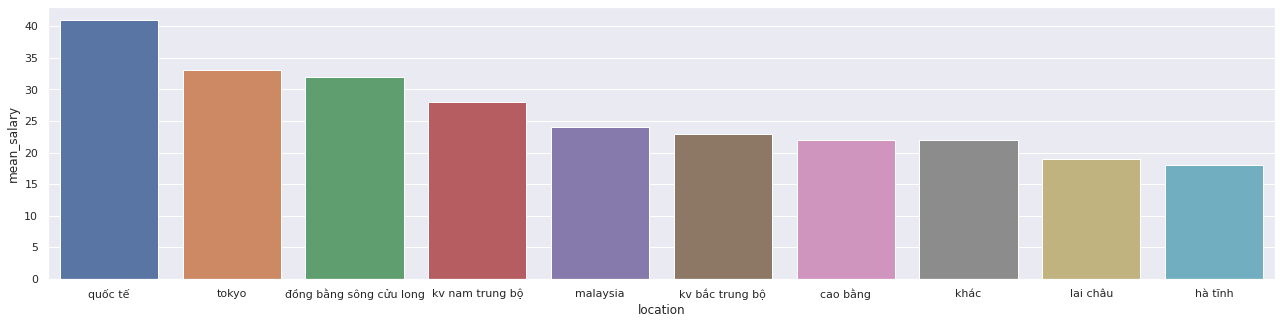

In [26]:
plt.figure(figsize=(22,5))
sns.barplot(data=salary_10, x="location", y="mean_salary")



> *Jobs with 'quốc tế' - international recruitment locations have the highest average salary, nearly 41 mil VND, but the number of such jobs is not much, only 8 jobs, mainly require to know another language. Followed by **Tokyo** with 33 mil VND and **Đồng Bằng Sông Cửa Long** with 32 mil VND. Surprisingly, we do not see the presence of Ho Chi Minh City and Hanoi in the top 10 locations with the highest average salary*


### **6/ What are the average salary per job?**

In [27]:
# List of values to search for
value_list = df_word_counts['word'].tolist()
# Function to check if a string is a substring of any of the values in `value_list`
def get_value(s):
    if isinstance(s, str):  # Check if s is a string
        for v in value_list:
            if v in s:
                return v
    return s

column = 'title'
# Apply the function to the column and create a boolean mask indicating which rows contain a value in `value_list`
mask = df[column].apply(lambda x: get_value(x) in value_list)

result = df[mask].applymap(get_value)
result

,title,article_link,company,company_link,salary,location,date,cleaned_title,new_salary,min_salary(VND),max_salary(VND)
7,chuyên viên kinh doanh,https://careerbuilder.vn/vi/tim-viec-lam/chuye...,công ty cổ phần đầu tư văn phú - invest,https://careerbuilder.vn/vi/nha-tuyen-dung/con...,cạnh tranh,hà nội,31-12-2022,chuyên viên kinh doanh,cạnh tranh,NaN,NaN
16,nhân viên chăm sóc khách hàng,https://careerbuilder.vn/vi/tim-viec-lam/nhan-...,công ty cổ phần đại thành,https://careerbuilder.vn/vi/nha-tuyen-dung/con...,5 tr - 7 tr vnd,đồng tháp,31-12-2022,nhân viên chăm sóc khách hàng,"(5.0, 7.0)",5.0,7.0
19,nhân viên kinh doanh,https://careerbuilder.vn/vi/tim-viec-lam/nhan-...,ms huong,https://careerbuilder.vn/vi/nha-tuyen-dung/ms-...,10 tr - 35 tr vnd,hồ chí minh,31-12-2022,nhân viên kinh doanh,"(10.0, 35.0)",10.0,35.0
20,trưởng phòng kinh doanh,https://careerbuilder.vn/vi/tim-viec-lam/truon...,công ty cổ phần tập đoàn sengroup,https://careerbuilder.vn/vi/nha-tuyen-dung/con...,cạnh tranh,hồ chí minh,31-12-2022,trưởng phòng kinh doanh,cạnh tranh,NaN,NaN
28,nhân viên kinh doanh,https://careerbuilder.vn/vi/tim-viec-lam/toan-...,tập đoàn tân á đại thành,https://careerbuilder.vn/vi/nha-tuyen-dung/tap...,10 tr - 20 tr vnd,toàn quốc,31-12-2022,nhân viên kinh doanh,"(10.0, 20.0)",10.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...
8476,nhân viên kinh doanh,https://careerbuilder.vn/vi/tim-viec-lam/nhan-...,công ty cổ phần sơn jymec việt nam,https://careerbuilder.vn/vi/nha-tuyen-dung/con...,10 tr - 20 tr vnd,quảng ninh,05-12-2022,nhân viên kinh doanh,"(10.0, 20.0)",10.0,20.0
8485,trưởng phòng kinh doanh,https://careerbuilder.vn/vi/tim-viec-lam/truon...,bảo mật,javascript:void(0);,20 tr - 50 tr vnd,hồ chí minh,05-12-2022,trưởng phòng kinh doanh,"(20.0, 50.0)",20.0,50.0
8488,nhân viên kế toán,https://careerbuilder.vn/vi/tim-viec-lam/nhan-...,thời trang lining,https://careerbuilder.vn/vi/nha-tuyen-dung/tho...,12 tr - 15 tr vnd,hà nội,05-12-2022,nhân viên kế toán,"(12.0, 15.0)",12.0,15.0
8489,nhân viên chăm sóc khách hàng,https://careerbuilder.vn/vi/tim-viec-lam/thanh...,thời trang lining,https://careerbuilder.vn/vi/nha-tuyen-dung/tho...,7 tr - 9 tr vnd,hà nội,05-12-2022,nhân viên chăm sóc khách hàng,"(7.0, 9.0)",7.0,9.0


In [28]:
result_salary = result[(result['new_salary'] != 'cạnh tranh') & (result['min_salary(VND)'] != 0)]
result_salary['mean_salary'] = (result_salary['max_salary(VND)'] + result_salary['min_salary(VND)']) /2
result_salary

<ipython-input-28-2387dcd37e78>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_salary['mean_salary'] = (result_salary['max_salary(VND)'] + result_salary['min_salary(VND)']) /2


,title,article_link,company,company_link,salary,location,date,cleaned_title,new_salary,min_salary(VND),max_salary(VND),mean_salary
16,nhân viên chăm sóc khách hàng,https://careerbuilder.vn/vi/tim-viec-lam/nhan-...,công ty cổ phần đại thành,https://careerbuilder.vn/vi/nha-tuyen-dung/con...,5 tr - 7 tr vnd,đồng tháp,31-12-2022,nhân viên chăm sóc khách hàng,"(5.0, 7.0)",5.0,7.0,6.0
19,nhân viên kinh doanh,https://careerbuilder.vn/vi/tim-viec-lam/nhan-...,ms huong,https://careerbuilder.vn/vi/nha-tuyen-dung/ms-...,10 tr - 35 tr vnd,hồ chí minh,31-12-2022,nhân viên kinh doanh,"(10.0, 35.0)",10.0,35.0,22.5
28,nhân viên kinh doanh,https://careerbuilder.vn/vi/tim-viec-lam/toan-...,tập đoàn tân á đại thành,https://careerbuilder.vn/vi/nha-tuyen-dung/tap...,10 tr - 20 tr vnd,toàn quốc,31-12-2022,nhân viên kinh doanh,"(10.0, 20.0)",10.0,20.0,15.0
45,nhân viên kinh doanh,https://careerbuilder.vn/vi/tim-viec-lam/nhan-...,công ty cổ phần dịch vụ viễn thông trí việt,https://careerbuilder.vn/vi/nha-tuyen-dung/con...,7 tr - 10 tr vnd,đồng tháp,31-12-2022,nhân viên kinh doanh,"(7.0, 10.0)",7.0,10.0,8.5
46,nhân viên kinh doanh,https://careerbuilder.vn/vi/tim-viec-lam/nhan-...,công ty cổ phần dịch vụ viễn thông trí việt,https://careerbuilder.vn/vi/nha-tuyen-dung/con...,7 tr - 10 tr vnd,vĩnh phúc,31-12-2022,nhân viên kinh doanh,"(7.0, 10.0)",7.0,10.0,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...
8476,nhân viên kinh doanh,https://careerbuilder.vn/vi/tim-viec-lam/nhan-...,công ty cổ phần sơn jymec việt nam,https://careerbuilder.vn/vi/nha-tuyen-dung/con...,10 tr - 20 tr vnd,quảng ninh,05-12-2022,nhân viên kinh doanh,"(10.0, 20.0)",10.0,20.0,15.0
8485,trưởng phòng kinh doanh,https://careerbuilder.vn/vi/tim-viec-lam/truon...,bảo mật,javascript:void(0);,20 tr - 50 tr vnd,hồ chí minh,05-12-2022,trưởng phòng kinh doanh,"(20.0, 50.0)",20.0,50.0,35.0
8488,nhân viên kế toán,https://careerbuilder.vn/vi/tim-viec-lam/nhan-...,thời trang lining,https://careerbuilder.vn/vi/nha-tuyen-dung/tho...,12 tr - 15 tr vnd,hà nội,05-12-2022,nhân viên kế toán,"(12.0, 15.0)",12.0,15.0,13.5
8489,nhân viên chăm sóc khách hàng,https://careerbuilder.vn/vi/tim-viec-lam/thanh...,thời trang lining,https://careerbuilder.vn/vi/nha-tuyen-dung/tho...,7 tr - 9 tr vnd,hà nội,05-12-2022,nhân viên chăm sóc khách hàng,"(7.0, 9.0)",7.0,9.0,8.0


In [47]:
avg_salary = round(result_salary.groupby('title')['mean_salary'].mean().sort_values(ascending = False).head(10).reset_index())
avg_salary

,title,mean_salary
0,trưởng phòng kinh doanh,28.0
1,chuyên viên kinh doanh,18.0
2,chuyên viên tư vấn,15.0
3,kế toán tổng hợp,15.0
4,nhân viên kinh doanh,15.0
5,chuyên viên quan hệ khách hàng cá nhân,15.0
6,chuyên viên tuyển dụng,13.0
7,nhân viên kế toán,11.0
8,nhân viên chăm sóc khách hàng,10.0
9,giao dịch viên,10.0


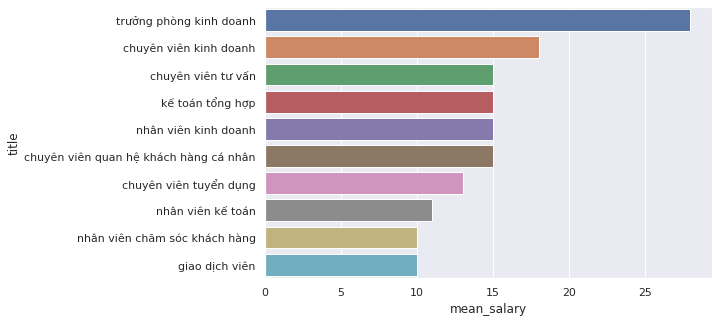

In [49]:
plt.figure(figsize=(8,5))
sns.barplot(data=avg_salary, x="mean_salary", y="title",)



> Among top 10 most recruited jobs, **trưởng phòng kinh doanh - Sales manager** is the job with the **highest average salary**, about 28 million/month. Followed by chuyên viên kinh doanh- business professionals at 18 millions. There 4 positions with the same average salary- at 15 million/month are chuyên viên tư vấn - consultants, kế toán tổng hợp - general accounting, nhân viên kinh doanh - business staff and chuyên viên quan hệ khách hàng cá nhân - personal customer relations specialist.


### **7/ Engineer Position overview**

In [30]:
#Check job related to engineer
engineer = df['title'].str.contains('lập trình viên') | df['title'].str.contains('software engineer') | df['title'].str.contains('engineer')
engineer_df = df[engineer]

In [31]:
engineer_df.shape

(514, 11)

In [32]:
engineer_df.groupby('location')['article_link'].count().reset_index().sort_values(by = 'article_link', ascending = False).head(5)

,location,article_link
11,hồ chí minh,228
7,hà nội,146
1,bình dương,52
21,đồng nai,37
8,hưng yên,8


In [33]:
engineer_df.head()

,title,article_link,company,company_link,salary,location,date,cleaned_title,new_salary,min_salary(VND),max_salary(VND)
38,lập trình viên,https://careerbuilder.vn/vi/tim-viec-lam/lap-t...,tổng công ty đối tác chân thật,https://careerbuilder.vn/vi/nha-tuyen-dung/ton...,10 tr - 15 tr vnd,hồ chí minh,31-12-2022,lập trình viên,"(10.0, 15.0)",10.0,15.0
83,.net engineer,https://careerbuilder.vn/vi/tim-viec-lam/net-e...,công ty cổ phần công nghệ haravan,https://careerbuilder.vn/vi/nha-tuyen-dung/con...,cạnh tranh,hồ chí minh,31-12-2022,.net engineer,cạnh tranh,NaN,NaN
106,cloud security engineer,https://careerbuilder.vn/vi/tim-viec-lam/cloud...,công ty tnhh viettel - cht,https://careerbuilder.vn/vi/nha-tuyen-dung/con...,cạnh tranh,hà nội,31-12-2022,cloud security engineer,cạnh tranh,NaN,NaN
174,maintenance engineer (có xe đưa đón ở tp.hcm),https://careerbuilder.vn/vi/tim-viec-lam/maint...,"amphenol technology vietnam co., ltd (factory 3)",https://careerbuilder.vn/vi/nha-tuyen-dung/amp...,cạnh tranh,long an,31-12-2022,maintenance engineer,cạnh tranh,NaN,NaN
179,kĩ sư dữ liệu (data engineer) - ban dự án,https://careerbuilder.vn/vi/tim-viec-lam/ki-su...,ngân hàng tmcp quân đội,https://careerbuilder.vn/vi/nha-tuyen-dung/nga...,cạnh tranh,hà nội,31-12-2022,kĩ sư dữ liệu ban dự án,cạnh tranh,NaN,NaN


In [34]:
engineer_df = engineer_df[engineer_df['new_salary'] != 'cạnh tranh']
engineer_df['mean_salary'] = engineer_df['max_salary(VND)'] - engineer_df['min_salary(VND)']
print('Max salary of Engineer position is:', engineer_df['max_salary(VND)'].max())
print('Min salary of Engineer position is:', engineer_df['min_salary(VND)'].min())
print('Average salary of Engineer position is:', round(engineer_df['mean_salary'].mean()))

Max salary of Engineer position is: 132.0
Min salary of Engineer position is: 1.0
Average salary of Engineer position is: 13


In [35]:
engineer_range = round(engineer_df.groupby('location')[['min_salary(VND)', 'max_salary(VND)']].mean().reset_index())

In [36]:
engineer_range

,location,min_salary(VND),max_salary(VND)
0,bình dương,16.0,22.0
1,bình định,22.0,31.0
2,bắc ninh,10.0,18.0
3,cần thơ,15.0,25.0
4,hà nam,14.0,19.0
5,hà nội,20.0,35.0
6,hưng yên,16.0,30.0
7,hải dương,45.0,65.0
8,hồ chí minh,20.0,34.0
9,long an,18.0,28.0


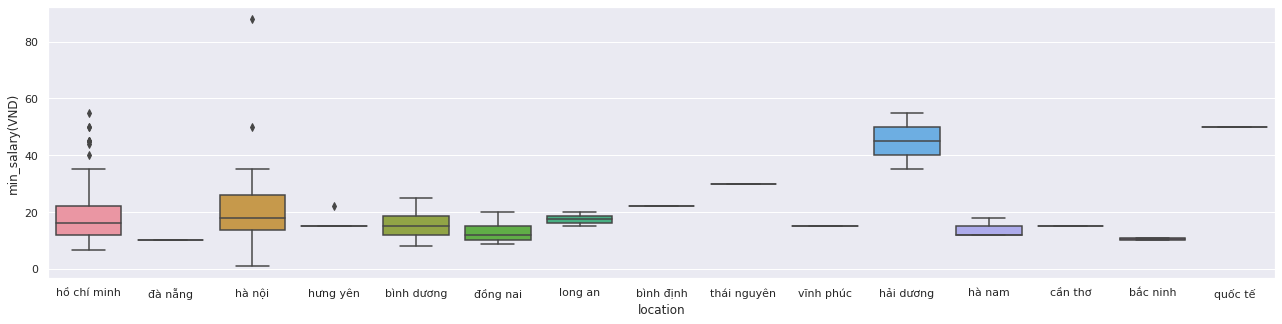

In [37]:
plt.figure(figsize=(22,5))
sns.boxplot(data= engineer_df, x = 'location', y="min_salary(VND)")

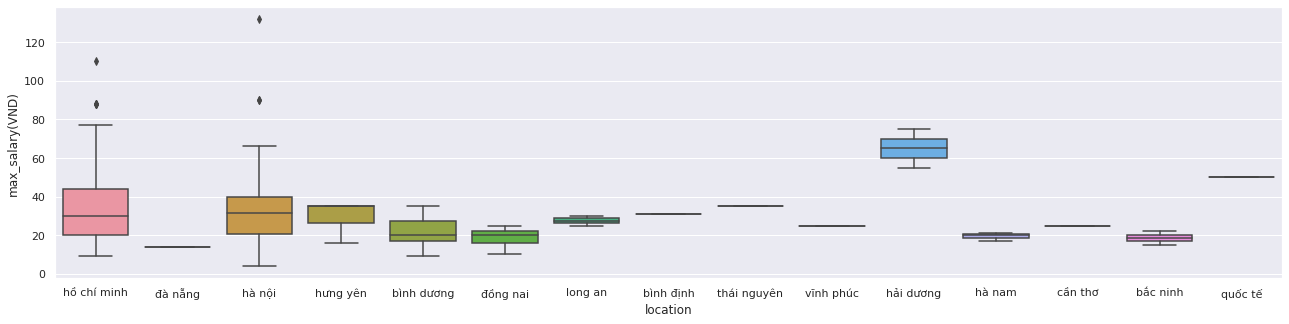

In [38]:
plt.figure(figsize=(22,5))
sns.boxplot(data= engineer_df, x = 'location', y="max_salary(VND)")



*   There are **514** jobs in total related to engineering during the period
*   Hồ Chí Minh, Hà Nội, Bình Dương, Đồng Nai & Hưng Yên are top 5 places to hire the most Engineer positions.
*   The number of engineers recruited in Hồ Chí Minh is nearly **more than 50%** compared to Hà Nội
*   **132 million/month is the maximum salary** for an Engineer Manager position at a Japanese Fintech company located in Hà Nội
*   1 million is the minimum in-range salary for an IT intern position in Hà Nội.
*   **Hải Dương** is the place with the highest average engineer salary.


### **8/ Data Analyst Position overview**

In [39]:
#Check job related to data
data = df['title'].str.contains('dữ liệu') | df['title'].str.contains('data') | df['title'].str.contains('analyst')
data_df = df[data]
data_df

,title,article_link,company,company_link,salary,location,date,cleaned_title,new_salary,min_salary(VND),max_salary(VND)
50,pr senior analyst (head office),https://careerbuilder.vn/vi/tim-viec-lam/pr-se...,công ty tnhh cj vina agri,https://careerbuilder.vn/vi/nha-tuyen-dung/con...,cạnh tranh,long an,31-12-2022,pr senior analyst,cạnh tranh,NaN,NaN
59,nhân viên kinh doanh - data có sẵn ( lương cb ...,https://careerbuilder.vn/vi/tim-viec-lam/nhan-...,công ty tnhh mediastep software việt nam,https://careerbuilder.vn/vi/nha-tuyen-dung/con...,trên 15 tr vnd,hồ chí minh,31-12-2022,nhân viên kinh doanh data có sẵn,15.0,15.0,15.0
67,[đà nẵng - hcm chuyên viên kinh doanh phần mềm...,https://careerbuilder.vn/vi/tim-viec-lam/da-na...,công ty tnhh mediastep software việt nam,https://careerbuilder.vn/vi/nha-tuyen-dung/con...,15 tr - 30 tr vnd,hồ chí minh,31-12-2022,[đà nẵng hcm chuyên viên kinh doanh phần mềm ...,"(15.0, 30.0)",15.0,30.0
107,chuyên viên phân tích nghiệp vụ (business anal...,https://careerbuilder.vn/vi/tim-viec-lam/chuye...,công ty cp công nghệ giáo dục trường học trực ...,https://careerbuilder.vn/vi/nha-tuyen-dung/con...,15 tr - 20 tr vnd,hà nội,31-12-2022,chuyên viên phân tích nghiệp vụ,"(15.0, 20.0)",15.0,20.0
123,chuyên viên quản trị cơ sở dữ liệu,https://careerbuilder.vn/vi/tim-viec-lam/chuye...,tổng công ty cổ phần bảo hiểm quân đội (mic),https://careerbuilder.vn/vi/nha-tuyen-dung/ton...,cạnh tranh,hà nội,31-12-2022,chuyên viên quản trị cơ sở dữ liệu,cạnh tranh,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7301,sales analytics & data management executive,https://careerbuilder.vn/vi/tim-viec-lam/sales...,geodis vietnam company ltd,https://careerbuilder.vn/vi/nha-tuyen-dung/geo...,cạnh tranh,hồ chí minh,11-12-2022,sales analytics & data management executive,cạnh tranh,NaN,NaN
7541,business analyst,https://careerbuilder.vn/vi/tim-viec-lam/busin...,mitek việt nam ( platinum global ),https://careerbuilder.vn/vi/nha-tuyen-dung/mit...,cạnh tranh,hồ chí minh,09-12-2022,business analyst,cạnh tranh,NaN,NaN
7678,chuyên gia hệ thống thông tin quản lý dữ liệu mis,https://careerbuilder.vn/vi/tim-viec-lam/chuye...,công ty tài chính tnhh mb shinsei (mcredit),https://careerbuilder.vn/vi/nha-tuyen-dung/con...,cạnh tranh,hà nội,09-12-2022,chuyên gia hệ thống thông tin quản lý dữ liệu mis,cạnh tranh,NaN,NaN
8000,chuyên viên phân tích dữ liệu b@w,https://careerbuilder.vn/vi/tim-viec-lam/chuye...,fe credit,https://careerbuilder.vn/vi/nha-tuyen-dung/fe-...,cạnh tranh,hồ chí minh,07-12-2022,chuyên viên phân tích dữ liệu b@w,cạnh tranh,NaN,NaN


In [40]:
data_df.groupby('location')['article_link'].count().reset_index().sort_values(by = 'article_link', ascending = False).head(5)

,location,article_link
6,hồ chí minh,189
3,hà nội,169
13,đồng nai,7
0,bình dương,5
11,đà nẵng,4


In [41]:
data_df = data_df[(data_df['new_salary'] != 'cạnh tranh') & (data_df['max_salary(VND)'] != 0.0)]
data_df['mean_salary'] = data_df['max_salary(VND)'] - data_df['min_salary(VND)']
print('Max salary of Data Analyst position is:', data_df['max_salary(VND)'].max())
print('Min salary of Data Analyst position is:', data_df['min_salary(VND)'].min())
print('Average salary of Data Analyst position is:', round(data_df['mean_salary'].mean()))

Max salary of Data Analyst position is: 66.0
Min salary of Data Analyst position is: 3.0
Average salary of Data Analyst position is: 12


<ipython-input-41-05f3beef52ea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['mean_salary'] = data_df['max_salary(VND)'] - data_df['min_salary(VND)']


In [42]:
data_range = round(data_df.groupby('location')[['min_salary(VND)', 'max_salary(VND)']].mean().reset_index())
data_range

,location,min_salary(VND),max_salary(VND)
0,bình dương,17.0,23.0
1,bình định,22.0,44.0
2,bắc ninh,15.0,19.0
3,hà nội,20.0,29.0
4,hải phòng,8.0,40.0
5,hậu giang,4.0,5.0
6,hồ chí minh,15.0,27.0
7,long an,8.0,10.0
8,vĩnh phúc,22.0,33.0
9,đồng nai,22.0,33.0


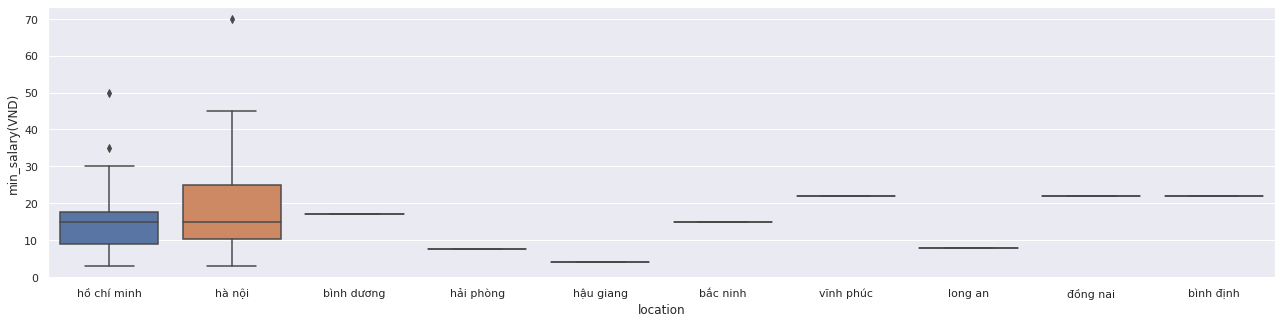

In [43]:
plt.figure(figsize=(22,5))
sns.boxplot(data= data_df, x = 'location', y="min_salary(VND)")

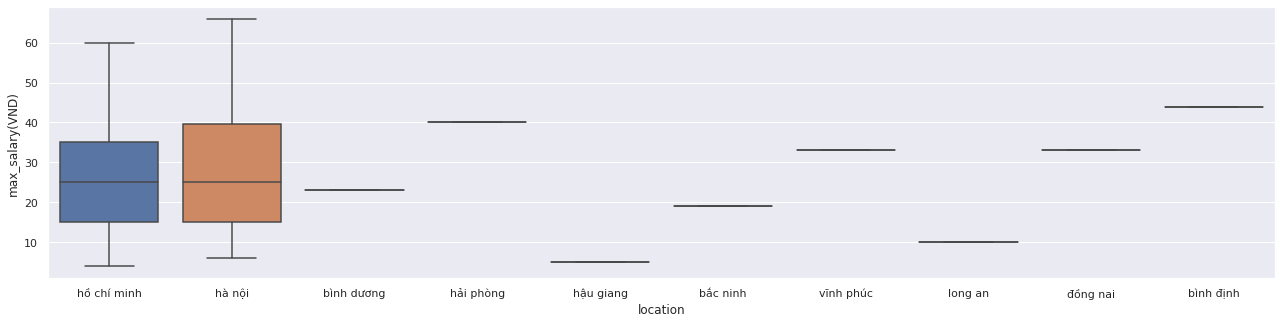

In [44]:
plt.figure(figsize=(22,5))
sns.boxplot(data= data_df, x = 'location', y="max_salary(VND)")

*   There are **386** jobs in total related to data during the period
*   Hồ Chí Minh, Hà Nội are top 2 places to hire the most Data positions, accounted for 92% of data job in the market
*   Hà Nội has the wider salary range for Data position than in HCM
*   The number of data jobs recruited in Ho Chi Minh is **equivalent** to Hanoi
*   **66 million/month is the maximum salary** for an data position as Senior Data Engineer or Data Scientist located in Hà Nội
*   **3 million is the minimum** in-range salary of an Data Entry Intern.

## **Conclusions:**
- **Bank** is one of the **most dynamic businesses** at the end of this year (SHB, MBB, ABB, and LPB) with hundreds of positions. 

- Besides, there are 2 software companies, Mediastep Software and FPT telecom, which are also in the battle to recruit people, respectively 316 jobs and 294 jobs. 

- Among the top 10 companies, there is a representative from the education sector; Ocean Edu has 263 jobs opens.

- **Sales staffs** are the most hiring position, followed by **business consultant** and **accountants**. **Sales Managers** and **tellers** are also much needed and looked for on Career Builder

- As can be guessed, **Hồ Chí Minh City** and **Hà Nội** are 2 places with the highest recruitment demand. While Hồ Chí Minh accounted for 38% then Hà Nội followed closely with 34%. Followed by Bình Dương, Đồng Nai, Long An, Đà Nẵng, Hải Phòng...

- *Jobs with 'quốc tế' - international recruitment locations have the highest average salary, nearly 41 mil VND, but the number of such jobs is not much, only 8 jobs, mainly require to know another language. 

- Followed by **Tokyo** with 33 mil VND and **Đồng Bằng Sông Cửa Long** with 32 mil VND. Surprisingly, we do not see the presence of Ho Chi Minh City and Hanoi in the top 10 locations with the highest average salary*

- Among top 10 most recruited jobs, **trưởng phòng kinh doanh - Sales manager** is the job with the **highest average salary**, about 28 million/month. Followed by chuyên viên kinh doanh- business professionals at 18 millions. 

- There **4 positions with the same average salary**- at **15 million/month** are chuyên viên tư vấn - **consultants**, kế toán tổng hợp - **general accounting**, nhân viên kinh doanh - **business staff** and chuyên viên quan hệ khách hàng cá nhân - **personal customer relations specialist**.

### Engineer Job

- There are **514** jobs in total related to engineering during the period

- **Hồ Chí Minh, Hà Nội, Bình Dương, Đồng Nai & Hưng Yên** are top 5 places to hire the most Engineer positions.

- The number of engineers recruited in Hồ Chí Minh is nearly **more than 50%** compared to Hà Nội

- **132 million/month** is the **maximum salary** for an Engineer Manager position at a Japanese Fintech company located in Hà Nội

-  **1 million/month** is the **minimum in-range salary** for an IT intern position in Hà Nội.

-  **Hải Dương** is the place with the highest average engineer salary.

### Data Analyst Job

-   There are **386** jobs in total related to data during the period

-   **Hồ Chí Minh, Hà Nội** are top 2 places to hire the most Data positions, accounted for **92%** of data job in the market

-   Hà Nội has the **wider salary range** for Data position than in HCM

-   The number of data jobs recruited in Ho Chi Minh is **equivalent** to Hanoi

-   **66 million/month** is the **maximum salary** for an data position as Senior Data Engineer or Data Scientist located in Hà Nội

-   **3 million/month** is the **minimum salary** of an Data Entry Intern.